# IMDB Movie Review Classification using LSTM

Obtain and preprocess the data:

In [ ]:
#!pip install numpy==1.16.2
import numpy as np
print(np.version)

<module 'numpy.version' from '/usr/local/lib/python3.6/dist-packages/numpy/version.py'>


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 25

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Let’s train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer.

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 50))
model.add(LSTM(32,recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 87s 554ms/step - loss: 0.5046 - acc: 0.7651 - val_loss: 0.4162 - val_acc: 0.8222
Epoch 2/10
157/157 [==============================] - 91s 577ms/step - loss: 0.3015 - acc: 0.8831 - val_loss: 0.3011 - val_acc: 0.8828
Epoch 3/10
157/157 [==============================] - 87s 557ms/step - loss: 0.2400 - acc: 0.9093 - val_loss: 0.2944 - val_acc: 0.8838
Epoch 4/10
157/157 [==============================] - 88s 559ms/step - loss: 0.2027 - acc: 0.9257 - val_loss: 0.3355 - val_acc: 0.8786
Epoch 5/10
157/157 [==============================] - 89s 565ms/step - loss: 0.1775 - acc: 0.9367 - val_loss: 0.2985 - val_acc: 0.8814
Epoch 6/10
157/157 [==============================] - 89s 568ms/step - loss: 0.1568 - acc: 0.9449 - val_loss: 0.4453 - val_acc: 0.8404
Epoch 7/10
157/157 [==============================] - 90s 573ms/step - loss: 0.1389 - acc: 0.9500 - val_loss: 0.3435 - val_acc: 0.8836
Epoch 8/10
157/157 [==============================] - 9

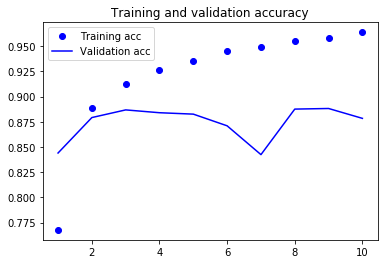

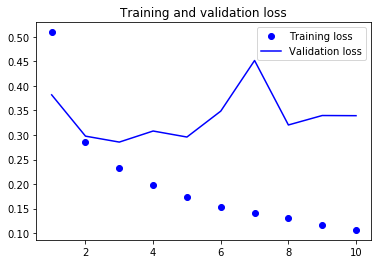

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


This time, you achieve up to 89% validation accuracy. Not bad: certainly much better
than the `SimpleRNN` network—that’s largely because LSTM suffers much less from the
vanishing-gradient problem—and slightly better than the fully connected approach
from chapter 3, even though you’re looking at less data than you were in chapter 3.
You’re truncating sequences after 500 timesteps, whereas in chapter 3, you were considering
full sequences.

But this result isn’t groundbreaking for such a computationally intensive
approach. Why isn’t LSTM performing better? One reason is that you made no effort
to tune hyperparameters such as the embeddings dimensionality or the LSTM output
dimensionality. Another may be lack of regularization. 

But honestly, the primary reason
is that analyzing the global, long-term structure of the reviews (what LSTM is good
at) isn’t helpful for a sentiment-analysis problem. Such a basic problem is well solved
by looking at what words occur in each review, and at what frequency. That’s what the
first fully connected approach looked at. But there are far more difficult natural language
processing problems out there, where the strength of LSTM will become
apparent: in particular, question-answering and machine translation.